### Machine Learning Practical Application Fun 
"AI in Hollywood" Series. Edition 1.0.
by Paul Morf, Machine Learning Specialist

###### Background:

Design a Recommend System that outputs a SSN to the user group. The input comes from anything the machine can gather from what is online aka a digital footprint from video, voice(phone etc), GPS tracking, purchases, emails, social media etc. One TV show that made this system/idea a common pop culture use for AI in the media is called Person of Interset. What is fascinating is that over the 5 seasons each episode displays with some elegance the use of AI to make decisions of life or death. Its pitfalls and strengths in lots of ways I think are realistically portrayed. This show fascinated me and is stil one of the only TV shows I have ever watched and loved. 

I am creating a series of projects based on "AI in Hollywood." Its almost like a myth busters but for AI specifically. I want to prove the reality or each possible use of AI. I am 100% doing this to practice ML in a personally meanigful and practical way and have no agenda otherwise. A reference to the show for this edition of my series can be seen by clicking the link here [https://www.imdb.com/title/tt1839578/].

###### Recommend System

Output Twitter handle. 


<u>ML Process/Plan Step</u>

1. Define purpose / Ask a quesiton(what to predict, recommend, classify etc.) 
Choose which ML to use here based on the need, Choose a variable to predict, What problem aspect of this needs ML vs other ways of solving it .
2. Source (pipeline here if needed or possible) 
Find data, pick what data will be used
3. Wrangle
Gather data visualize and check it out and clean data,Create features, normalize
4. Model _ Train - Find Patterns 
 Split into sample data, training data and maybe validation data sets, Build the model, Test data 
5. Predictions (goal highly accurate & quality) on fresh data 
Determine what is accurate
Evaluate model and maybe change question if needed and optimize model
6. Possible Deploy 
If possible find new data to stream to the model and deploy it for ongoing predictions 
maintain and adjust the model and or Retrain if needed with data drift etc. 

##### Face Detection with Classifier Cascade face detection algorithm (OpenCV )

In [ ]:
# A modern implementation of the Classifier Cascade face detection algorithm is provided in the OpenCV library. 
# This is a C++ computer vision library that provides a python interface.
import cv2
# print version number
print(cv2.__version__)
from cv2 import imread
from cv2 import CascadeClassifier
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import rectangle

In [ ]:
# load the photograph
# pixels = imread('test1.jpg')
# load the 2nd photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
# bboxes = classifier.detectMultiScale(pixels)
# fine - tune
# bboxes = classifier.detectMultiScale(pixels, 1.1, 3)
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)

In [ ]:
# print bounding box for each detected face
for box in bboxes:
    print(box)

In [ ]:
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

NOTE: Even with fine tuning not working out perfect but ok. Missed 2 faces.

##### Face Detection With Deep Learning

In [1]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

Using TensorFlow backend.
/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/p

0.1.0


/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/paulmurff/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/paulmu

In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)



In [3]:
for face in faces:
	print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


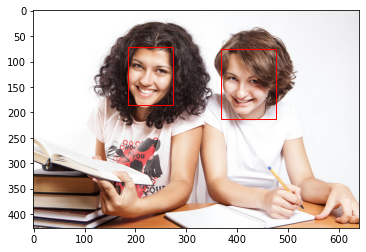

In [4]:
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [5]:
# get coordinates
x1, y1, width, height = result['box']
x2, y2 = x1 + width, y1 + height
# extract face
face = data[y1:y2, x1:x2]

NameError: name 'result' is not defined

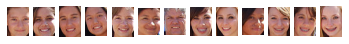

In [6]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)